

# <font color='Grey'> Automatizando Machine Learning </font>


![alt text](https://cienciadosdados.com/images/pycaret.png)

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/Screenshot-from-2020-05-13-18-30-22.png)


https://pycaret.readthedocs.io/en/latest/api/classification.html

**PyCaret** é uma biblioteca de aprendizado de máquina de código aberto e baixo código em Python que automatiza fluxos de trabalho de aprendizado de máquina. É uma ferramenta de aprendizado de máquina e gerenciamento de modelos de ponta a ponta que acelera o ciclo de experimentos exponencialmente e torna você mais produtivo.


Em comparação com as outras bibliotecas de aprendizado de máquina de código aberto, PyCaret é uma biblioteca alternativa de baixo código que pode ser usada para **substituir centenas de linhas de código com apenas algumas palavras.** Isso torna os experimentos exponencialmente rápidos e eficientes. 


PyCaret **é essencialmente um empacotador Python** em torno de várias bibliotecas e estruturas de aprendizado de máquina, como scikit-learn , XGBoost , LightGBM , CatBoost , spaCy , Optuna , Hyperopt , Ray e muitos mais.

In [1]:
# Instalação do pacote pycaret e shap (pacote de interpretabilidade da máquina preditiva)
#!pip install pycaret
#!pip install shap

In [2]:
#Importação de Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Qual Problema Vamos Resolver e onde estão os dados?

Vamos resolver um problema de classificação. Temos um **conjunto de dados de uma fintech** (é toda empresa que se propõe a oferecer serviços relacionados ao seu dinheiro, só que a custos bem mais baixos que os dos bancos, e beneficiando-se do imenso alcance da interne)com características como idade do cliente, experiência, renda, escolaridade e se ele possui um cartão de crédito ou não. 

Essa **Fintech** deseja construir um modelo de aprendizado de máquina que os ajudará a **identificar os clientes em potencial com maior probabilidade de adquirir um empréstimo pessoal.**



In [3]:
# Fonte de Dados no Github
dados = pd.read_csv('https://raw.githubusercontent.com/datacodebr/PyCaret-Example/master/datasets/loan_train_data.csv')

# Análise Exploratória

In [4]:
# Vendo os Primeiros Registros
dados.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0  3510   38          12      61     91330       3    0.9          3   
1  1129   30           5     171     94025       2    1.9          2   
2  1637   65          39     100     92122       4    1.7          3   
3  3165   28           4      82     95136       4    0.0          1   
4  3563   32           8     169     94596       1    6.5          3   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard  
0         0              0                   0           0       0           0  
1         0              1                   0           0       0           0  
2         0              0                   0           0       0           1  
3         0              0                   0           0       1           1  
4       272              1                   1           1       1           0

In [5]:
#ultimas linhas
dados.tail()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
3995  3598   56          26      51     92028       3    2.0          3   
3996  4671   52          26     194     94305       1    1.7          1   
3997   989   63          39      32     94998       1    1.9          2   
3998  2038   35           8      52     95616       2    1.0          2   
3999  2175   30           5     123     95605       2    3.1          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
3995         0              0                   0           0       1   
3996         0              0                   0           0       1   
3997       100              0                   0           0       0   
3998         0              0                   0           0       0   
3999         0              0                   0           0       1   

      CreditCard  
3995           0  
3996           0  
3997           0  
3998           1  
3999           0

In [6]:
dados.sample().T

3518
ID                   4355.0
Age                    40.0
Experience             16.0
Income                140.0
ZIP Code            93940.0
Family                  3.0
CCAvg                   5.6
Education               1.0
Mortgage                0.0
Personal Loan           1.0
Securities Account      0.0
CD Account              0.0
Online                  0.0
CreditCard              0.0

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4000 non-null   int64  
 1   Age                 4000 non-null   int64  
 2   Experience          4000 non-null   int64  
 3   Income              4000 non-null   int64  
 4   ZIP Code            4000 non-null   int64  
 5   Family              4000 non-null   int64  
 6   CCAvg               4000 non-null   float64
 7   Education           4000 non-null   int64  
 8   Mortgage            4000 non-null   int64  
 9   Personal Loan       4000 non-null   int64  
 10  Securities Account  4000 non-null   int64  
 11  CD Account          4000 non-null   int64  
 12  Online              4000 non-null   int64  
 13  CreditCard          4000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 437.6 KB


In [8]:
## verificando o tipo das variáveis de cada coluna (se são strings, integers, floats, bool)
dados.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [9]:
dados.size

56000

In [10]:
# formato do dataset (linhas; colunas)
dados.shape

(4000, 14)

In [11]:
# lista de todas as colunas do dataset
dados.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [12]:
# verificação da presença de valores ausentes no dataset é de extrema importância, pois é o reflexo direto da qualidade do mesmo.
dados.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [13]:
# valores únicos para cada feature
dados.nunique().sort_values()

Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Education                3
Family                   4
Age                     45
Experience              47
CCAvg                  106
Income                 162
Mortgage               325
ZIP Code               464
ID                    4000
dtype: int64

In [14]:
# retorna a quantidade de linha de todas as colunas
dados.count()

ID                    4000
Age                   4000
Experience            4000
Income                4000
ZIP Code              4000
Family                4000
CCAvg                 4000
Education             4000
Mortgage              4000
Personal Loan         4000
Securities Account    4000
CD Account            4000
Online                4000
CreditCard            4000
dtype: int64

In [15]:
# Verificando o skew de cada atributo
dados.skew()

ID                     0.005602
Age                   -0.038878
Experience            -0.038171
Income                 0.844241
ZIP Code             -13.912253
Family                 0.145866
CCAvg                  1.601338
Education              0.245195
Mortgage               2.122391
Personal Loan          2.743813
Securities Account     2.617635
CD Account             3.773581
Online                -0.359814
CreditCard             0.894110
dtype: float64

In [16]:
# Verifique se há duplicado
dados.duplicated().sum()

0

In [17]:
#removendo duplicados colunas
_,i =np.unique(dados.columns, return_index=True)
data=dados.iloc[:, i]

In [18]:
# variavel target
dados['Personal Loan'].sample(10)

3423    0
3391    0
1095    1
3064    0
1975    0
3105    0
2379    0
2463    0
2035    0
3404    0
Name: Personal Loan, dtype: int64

In [19]:
# vendo a quantidade de '0' e '1' em nossos dados
dados['Personal Loan'].value_counts()

0    3616
1     384
Name: Personal Loan, dtype: int64

In [20]:
# resumo estatístico das variáveis numéricas.
dados.describe()

ID          Age   Experience       Income     ZIP Code  \
count  4000.000000  4000.000000  4000.000000  4000.000000   4000.00000   
mean   2488.592500    45.294500    20.077500    73.545500  93159.61325   
std    1440.324271    11.473586    11.475557    45.959052   2204.05801   
min       2.000000    23.000000    -3.000000     8.000000   9307.00000   
25%    1235.500000    35.000000    10.000000    39.000000  91910.75000   
50%    2481.500000    45.000000    20.000000    64.000000  93555.00000   
75%    3735.250000    55.000000    30.000000    98.000000  94609.00000   
max    5000.000000    67.000000    43.000000   224.000000  96651.00000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  4000.000000  4000.000000  4000.000000  4000.000000    4000.000000   
mean      2.401000     1.941445     1.872000    56.358500       0.096000   
std       1.147836     1.759555     0.841899   101.672188       0.294628   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   100.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account   CD Account       Online   CreditCard  
count          4000.00000  4000.000000  4000.000000  4000.000000  
mean              0.10275     0.058250     0.588500     0.296000  
std               0.30367     0.234245     0.492167     0.456548  
min               0.00000     0.000000     0.000000     0.000000  
25%               0.00000     0.000000     0.000000     0.000000  
50%               0.00000     0.000000     1.000000     0.000000  
75%               0.00000     0.000000     1.000000     1.000000  
max               1.00000     1.000000     1.000000     1.000000

In [21]:
dados.describe(include ='all')

ID          Age   Experience       Income     ZIP Code  \
count  4000.000000  4000.000000  4000.000000  4000.000000   4000.00000   
mean   2488.592500    45.294500    20.077500    73.545500  93159.61325   
std    1440.324271    11.473586    11.475557    45.959052   2204.05801   
min       2.000000    23.000000    -3.000000     8.000000   9307.00000   
25%    1235.500000    35.000000    10.000000    39.000000  91910.75000   
50%    2481.500000    45.000000    20.000000    64.000000  93555.00000   
75%    3735.250000    55.000000    30.000000    98.000000  94609.00000   
max    5000.000000    67.000000    43.000000   224.000000  96651.00000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  4000.000000  4000.000000  4000.000000  4000.000000    4000.000000   
mean      2.401000     1.941445     1.872000    56.358500       0.096000   
std       1.147836     1.759555     0.841899   101.672188       0.294628   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   100.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account   CD Account       Online   CreditCard  
count          4000.00000  4000.000000  4000.000000  4000.000000  
mean              0.10275     0.058250     0.588500     0.296000  
std               0.30367     0.234245     0.492167     0.456548  
min               0.00000     0.000000     0.000000     0.000000  
25%               0.00000     0.000000     0.000000     0.000000  
50%               0.00000     0.000000     1.000000     0.000000  
75%               0.00000     0.000000     1.000000     1.000000  
max               1.00000     1.000000     1.000000     1.000000

In [22]:
# Correlação de Pearson
dados.corr(method = 'pearson').round(4)

ID     Age  Experience  Income  ZIP Code  Family  \
ID                  1.0000 -0.0190     -0.0189 -0.0097    0.0245 -0.0054   
Age                -0.0190  1.0000      0.9943 -0.0551   -0.0383 -0.0493   
Experience         -0.0189  0.9943      1.0000 -0.0461   -0.0375 -0.0546   
Income             -0.0097 -0.0551     -0.0461  1.0000   -0.0169 -0.1602   
ZIP Code            0.0245 -0.0383     -0.0375 -0.0169    1.0000  0.0041   
Family             -0.0054 -0.0493     -0.0546 -0.1602    0.0041  1.0000   
CCAvg              -0.0136 -0.0531     -0.0508  0.6448   -0.0062 -0.1145   
Education           0.0208  0.0400      0.0117 -0.1764   -0.0149  0.0705   
Mortgage           -0.0142 -0.0103     -0.0086  0.2107    0.0156 -0.0261   
Personal Loan      -0.0127 -0.0016     -0.0005  0.5015   -0.0033  0.0577   
Securities Account -0.0321 -0.0057     -0.0065 -0.0014   -0.0021  0.0195   
CD Account          0.0069  0.0134      0.0166  0.1706    0.0151  0.0089   
Online              0.0036 -0.0044     -0.0036  0.0142    0.0136  0.0115   
CreditCard          0.0291  0.0074      0.0095 -0.0010    0.0060  0.0030   

                     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.0136     0.0208   -0.0142        -0.0127   
Age                -0.0531     0.0400   -0.0103        -0.0016   
Experience         -0.0508     0.0117   -0.0086        -0.0005   
Income              0.6448    -0.1764    0.2107         0.5015   
ZIP Code           -0.0062    -0.0149    0.0156        -0.0033   
Family             -0.1145     0.0705   -0.0261         0.0577   
CCAvg               1.0000    -0.1338    0.1068         0.3557   
Education          -0.1338     1.0000   -0.0286         0.1463   
Mortgage            0.1068    -0.0286    1.0000         0.1314   
Personal Loan       0.3557     0.1463    0.1314         1.0000   
Securities Account  0.0206    -0.0151    0.0102         0.0267   
CD Account          0.1271     0.0175    0.0911         0.3103   
Online              0.0039    -0.0149   -0.0085         0.0087   
CreditCard         -0.0066    -0.0198   -0.0178        -0.0012   

                    Securities Account  CD Account  Online  CreditCard  
ID                             -0.0321      0.0069  0.0036      0.0291  
Age                            -0.0057      0.0134 -0.0044      0.0074  
Experience                     -0.0065      0.0166 -0.0036      0.0095  
Income                         -0.0014      0.1706  0.0142     -0.0010  
ZIP Code                       -0.0021      0.0151  0.0136      0.0060  
Family                          0.0195      0.0089  0.0115      0.0030  
CCAvg                           0.0206      0.1271  0.0039     -0.0066  
Education                      -0.0151      0.0175 -0.0149     -0.0198  
Mortgage                        0.0102      0.0911 -0.0085     -0.0178  
Personal Loan                   0.0267      0.3103  0.0087     -0.0012  
Securities Account              1.0000      0.3307  0.0052     -0.0102  
CD Account                      0.3307      1.0000  0.1711      0.2737  
Online                          0.0052      0.1711  1.0000      0.0047  
CreditCard                     -0.0102      0.2737  0.0047      1.0000

In [23]:
# Correlação de spearman - leva em consideração  a correlação positiva e negativa
dados.corr('spearman').round(4)

ID     Age  Experience  Income  ZIP Code  Family  \
ID                  1.0000 -0.0189     -0.0187 -0.0079    0.0134 -0.0042   
Age                -0.0189  1.0000      0.9944 -0.0581   -0.0426 -0.0461   
Experience         -0.0187  0.9944      1.0000 -0.0512   -0.0422 -0.0507   
Income             -0.0079 -0.0581     -0.0512  1.0000   -0.0315 -0.1381   
ZIP Code            0.0134 -0.0426     -0.0422 -0.0315    1.0000  0.0190   
Family             -0.0042 -0.0461     -0.0507 -0.1381    0.0190  1.0000   
CCAvg              -0.0056 -0.0484     -0.0502  0.5780   -0.0134 -0.0784   
Education           0.0207  0.0381      0.0109 -0.1730   -0.0041  0.0741   
Mortgage           -0.0201 -0.0077     -0.0069  0.0607    0.0219 -0.0039   
Personal Loan      -0.0127 -0.0021     -0.0012  0.4307   -0.0064  0.0582   
Securities Account -0.0321 -0.0055     -0.0068  0.0032   -0.0022  0.0196   
CD Account          0.0069  0.0130      0.0151  0.1426    0.0134  0.0099   
Online              0.0035 -0.0043     -0.0036  0.0087    0.0276  0.0106   
CreditCard          0.0291  0.0069      0.0088 -0.0026    0.0224  0.0031   

                     CCAvg  Education  Mortgage  Personal Loan  \
ID                 -0.0056     0.0207   -0.0201        -0.0127   
Age                -0.0484     0.0381   -0.0077        -0.0021   
Experience         -0.0502     0.0109   -0.0069        -0.0012   
Income              0.5780    -0.1730    0.0607         0.4307   
ZIP Code           -0.0134    -0.0041    0.0219        -0.0064   
Family             -0.0784     0.0741   -0.0039         0.0582   
CCAvg               1.0000    -0.0973    0.0174         0.3074   
Education          -0.0973     1.0000   -0.0088         0.1491   
Mortgage            0.0174    -0.0088    1.0000         0.0560   
Personal Loan       0.3074     0.1491    0.0560         1.0000   
Securities Account  0.0301    -0.0146    0.0081         0.0267   
CD Account          0.1137     0.0178    0.0624         0.3103   
Online             -0.0021    -0.0145   -0.0059         0.0087   
CreditCard         -0.0050    -0.0198   -0.0136        -0.0012   

                    Securities Account  CD Account  Online  CreditCard  
ID                             -0.0321      0.0069  0.0035      0.0291  
Age                            -0.0055      0.0130 -0.0043      0.0069  
Experience                     -0.0068      0.0151 -0.0036      0.0088  
Income                          0.0032      0.1426  0.0087     -0.0026  
ZIP Code                       -0.0022      0.0134  0.0276      0.0224  
Family                          0.0196      0.0099  0.0106      0.0031  
CCAvg                           0.0301      0.1137 -0.0021     -0.0050  
Education                      -0.0146      0.0178 -0.0145     -0.0198  
Mortgage                        0.0081      0.0624 -0.0059     -0.0136  
Personal Loan                   0.0267      0.3103  0.0087     -0.0012  
Securities Account              1.0000      0.3307  0.0052     -0.0102  
CD Account                      0.3307      1.0000  0.1711      0.2737  
Online                          0.0052      0.1711  1.0000      0.0047  
CreditCard                     -0.0102      0.2737  0.0047      1.0000

In [24]:
dados.corr().unstack().sort_values().drop_duplicates()

Education      Income          -0.176367
Family         Income          -0.160228
CCAvg          Education       -0.133820
               Family          -0.114486
Age            Income          -0.055071
                                  ...   
CCAvg          Personal Loan    0.355700
Personal Loan  Income           0.501489
Income         CCAvg            0.644756
Age            Experience       0.994316
ID             ID               1.000000
Length: 92, dtype: float64

                          ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.019047   -0.018862 -0.009714  0.024504   
Age                -0.019047  1.000000    0.994316 -0.055071 -0.038349   
Experience         -0.018862  0.994316    1.000000 -0.046066 -0.037486   
Income             -0.009714 -0.055071   -0.046066  1.000000 -0.016950   
ZIP Code            0.024504 -0.038349   -0.037486 -0.016950  1.000000   
Family             -0.005388 -0.049318   -0.054567 -0.160228  0.004141   
CCAvg              -0.013588 -0.053120   -0.050828  0.644756 -0.006213   
Education           0.020837  0.039965    0.011691 -0.176367 -0.014860   
Mortgage           -0.014198 -0.010319   -0.008622  0.210737  0.015647   
Personal Loan      -0.012696 -0.001634   -0.000500  0.501489 -0.003313   
Securities Account -0.032052 -0.005673   -0.006519 -0.001437 -0.002091   
CD Account          0.006894  0.013434    0.016646  0.170629  0.015095   
Online              0.003598 -0.004440

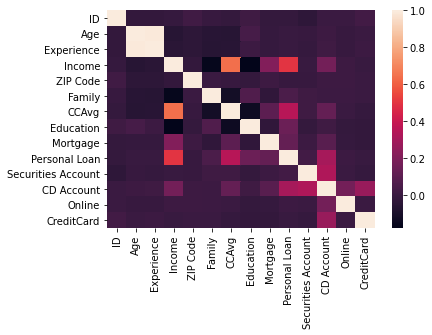

In [25]:
corr = dados.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns);

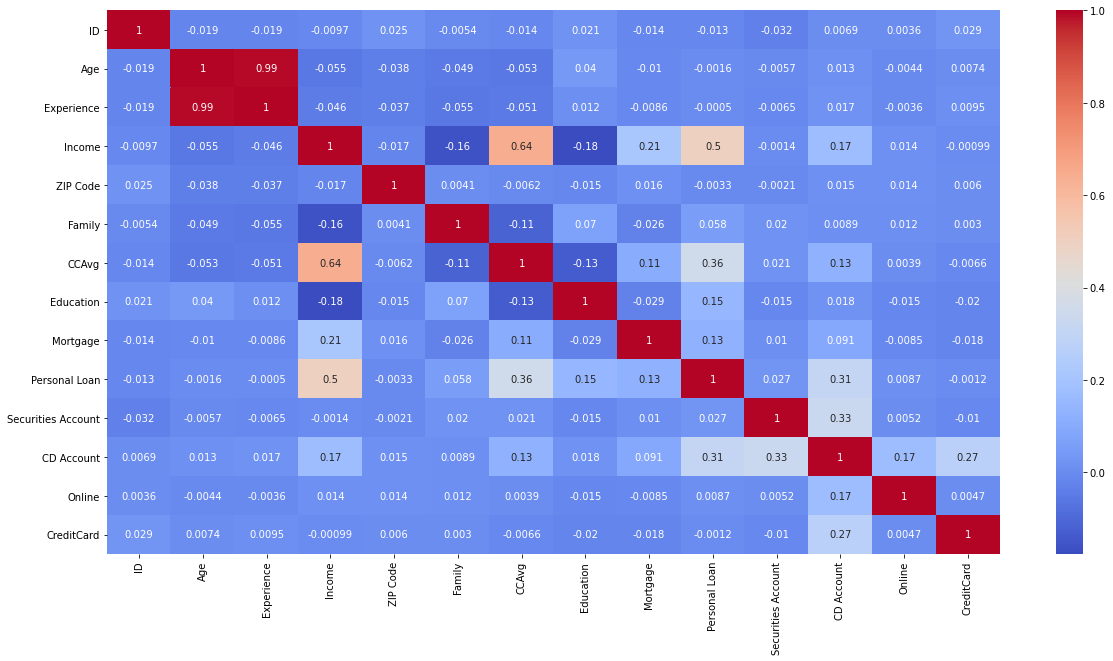

In [26]:
plt.figure(figsize=(20,10)) 
sns.heatmap(dados.corr(), annot = True, cmap="coolwarm");

In [27]:
# Uma maneira mais robusta de descobrir correlações diferentes das observações acima é gerar uma correlação completa
# tabela com variação de -1 a 1
dados.corr().style.background_gradient(cmap='coolwarm')

In [28]:
# porcentagem de 0 e 1
dados['Personal Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

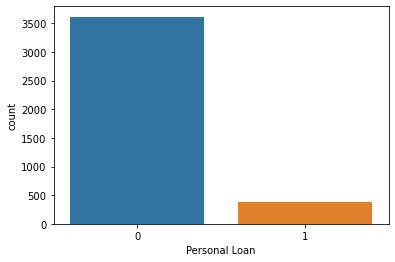

In [29]:
# Look at breakdown of label
dados['Personal Loan'].value_counts()
sns.countplot(dados['Personal Loan']);

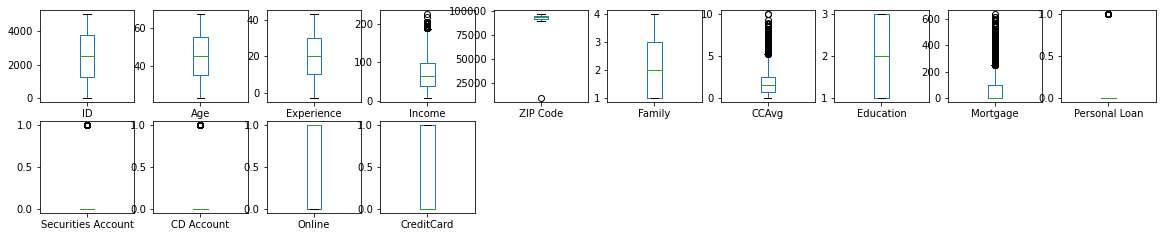

In [30]:
dados.plot(kind= 'box' , subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(20,20));

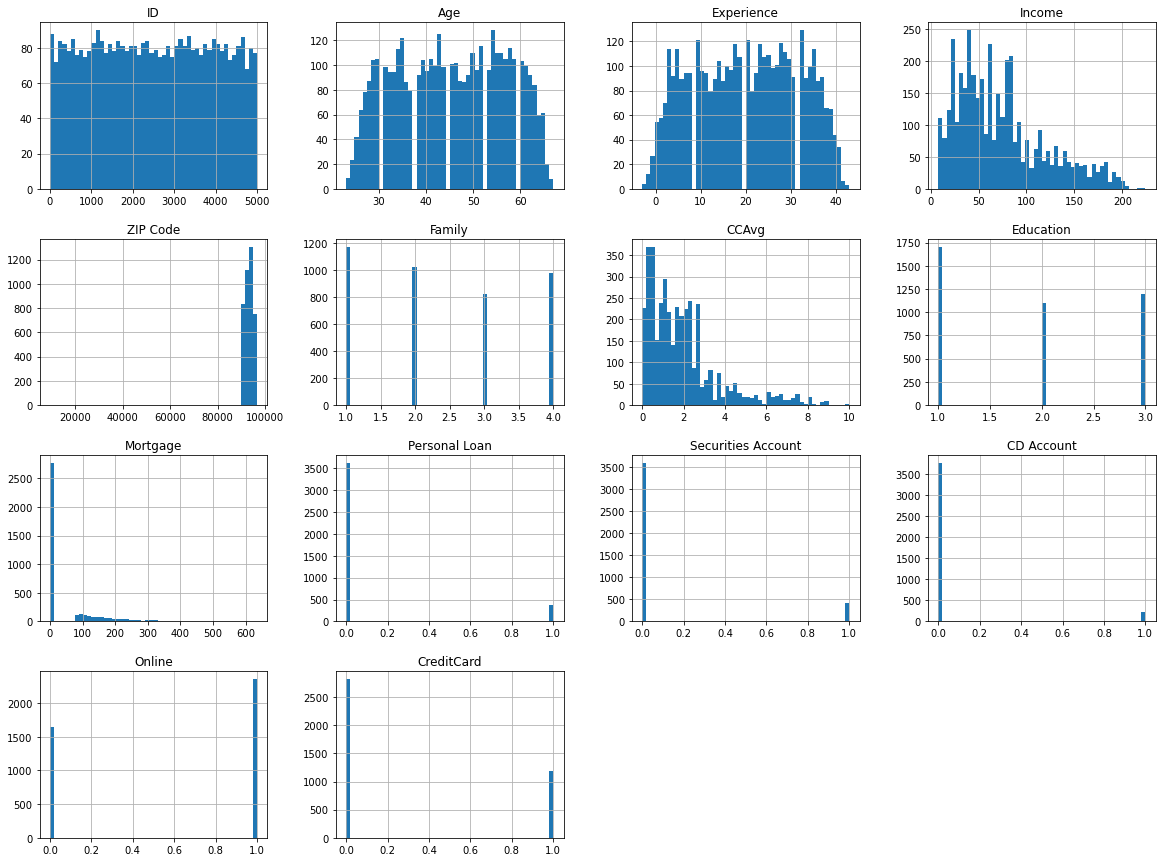

In [31]:
dados.hist(bins=50, figsize=(20, 15))
plt.show();

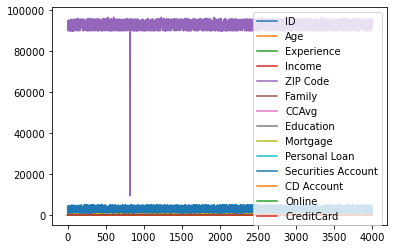

In [32]:
dados.plot();

In [33]:
## ## Sweetviz  Relatório
import sweetviz as sv
my_report = sv.analyze(dados) # cria o reporte e chama de my_report
my_report.show_html()

# sv.anlyze(data).show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [34]:
## Pandas Profiling Relatório

from pandas_profiling import ProfileReport
import pandas_profiling

profile = ProfileReport(dados, title='Relatório Pandas', html={'style':{'full_width':True}})

profile.to_notebook_iframe()

profile.to_file(output_file="Relatório Pandas'")

In [35]:
# Verificando a Versão dos Pacotes
from pycaret.utils import version
version()

'2.2.3'

In [36]:
# Importando o Pacote de Algoritmos de Classificação (mostrar na doc.)
from pycaret import classification


## Montando o SETUP - Configurando o Ambiente do Pycaret

A primeira etapa antes de iniciar nosso projeto de aprendizado de máquina no PyCaret é configurar o ambiente. É apenas um processo de duas etapas:

**1° Importando o Módulo:** 

Dependendo do tipo de problema que você vai resolver, primeiro você precisa importar o módulo. 

Temos 6 módulos diferentes disponíveis - regressão, classificação, clustering, processamento de linguagem natural (NLP), detecção de anomalias e regra de mineração associada. 

Vamos resolver um problema de classificação e, portanto, vamos importar o módulo de classificação


**2° Inicializando a configuração:** 

Nesta etapa, o PyCaret executa algumas tarefas básicas de pré-processamento, como ignorar os IDs e as colunas de data, imputar os valores ausentes, codificar as variáveis ​​categóricas e dividir o conjunto de dados na divisão de teste de trem para o restante das etapas de modelagem.

Quando você executa a função de configuração, ela primeiro confirma os tipos de dados e, em seguida, se você pressionar **enter**, criará o ambiente para você prosseguir

In [38]:
# SETUP
classification_setup = classification.setup(data= dados, target='Personal Loan')

**Escolhendo o algortimo**

‘lr’ - Logistic Regression

‘knn’ - K Neighbors Classifier

‘nb’ - Naive Bayes

‘dt’ - Decision Tree Classifier

‘svm’ - SVM - Linear Kernel

‘rbfsvm’ - SVM - Radial Kernel

‘gpc’ - Gaussian Process Classifier

‘mlp’ - MLP Classifier

‘ridge’ - Ridge Classifier

‘rf’ - Random Forest Classifier

‘qda’ - Quadratic Discriminant Analysis

‘ada’ - Ada Boost Classifier

‘gbc’ - Gradient Boosting Classifier

‘lda’ - Linear Discriminant Analysis

‘et’ - Extra Trees Classifier

‘xgboost’ - Extreme Gradient Boosting

‘lightgbm’ - Light Gradient Boosting Machine

‘catboost’ - CatBoost Classifier

In [39]:
#Escolhendo o Algoritmo 
# 'dt’ - Decision Tree Classifier
classification_dt = classification.create_model('dt')

In [40]:
#Escolhendo o Algoritmo 
# ‘xgboost’ - Extreme Gradient Boosting
classification_xgb = classification.create_model('xgboost')

In [41]:
#Escolhendo o Método de Aprendizagem Boosting
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

In [42]:
# Juntando Algoritmos
blender = classification.blend_models(estimator_list=[classification_dt, classification_xgb])

## Avaliação: Comparação de Algoritmos

Esta é outra função útil da biblioteca PyCaret. Se você não quiser experimentar os diferentes modelos um por um, pode usar a função comparar modelos e ela treinará e comparará as métricas de avaliação comuns para todos os modelos disponíveis na biblioteca do módulo que você importou.

In [43]:
#Comparação de modelos
classification.compare_models()

In [44]:
# Criando a Máquina com o Algoritmo Escolhido.
classification_catboost = classification.create_model('catboost')

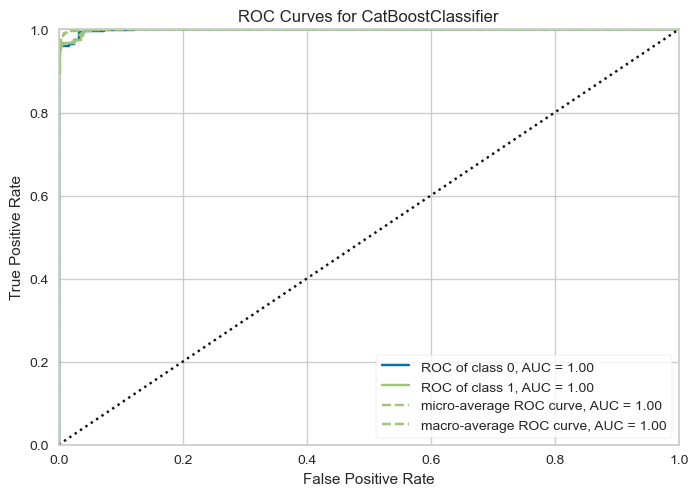

In [45]:
# Avaliando Métricas : AUC
classification.plot_model(classification_catboost, plot  =  'auc' )

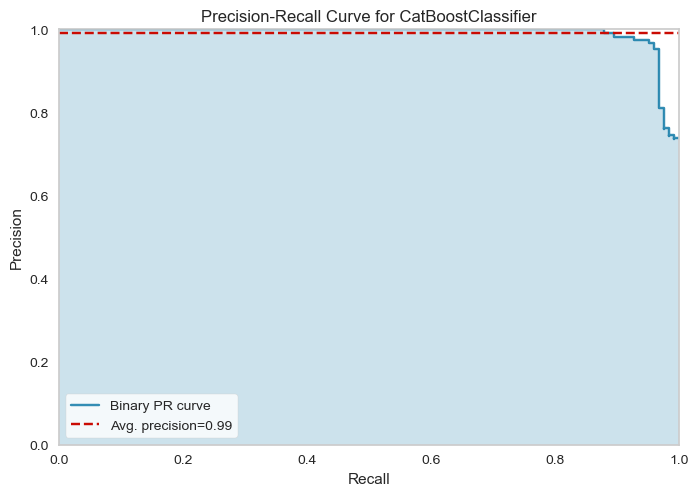

In [46]:
# Avaliando Métricas : Precision Recall
classification.plot_model(classification_catboost, plot = 'pr')

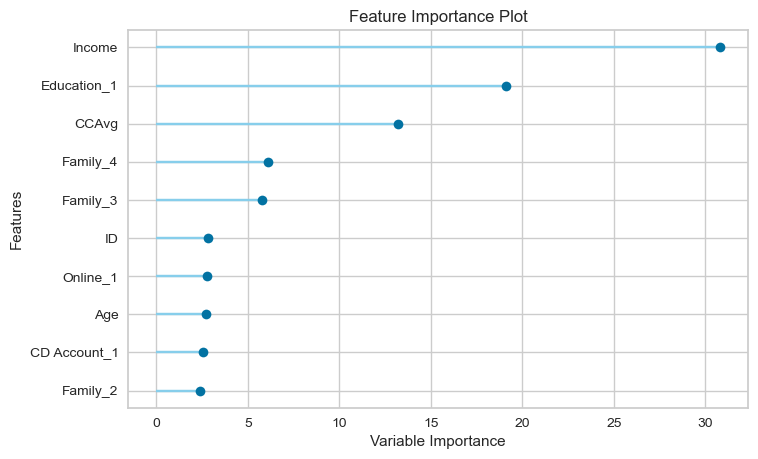

In [47]:
# Importância das Variáveis
classification.plot_model(classification_catboost, plot = 'feature')

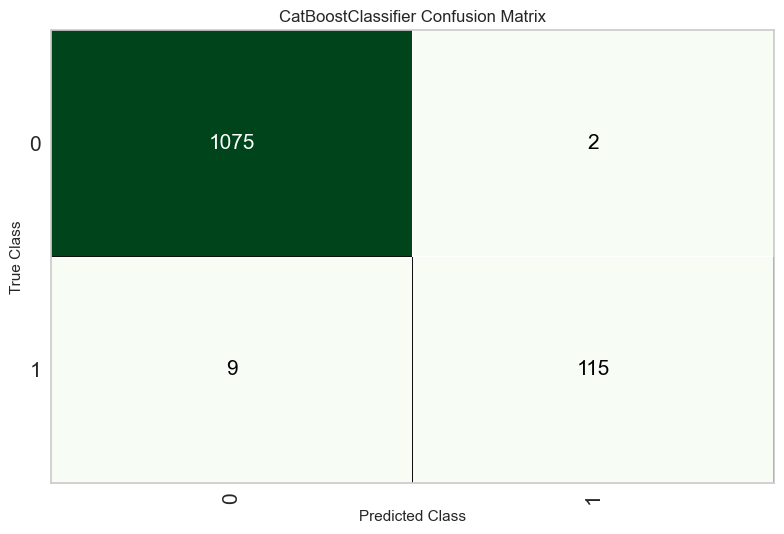

In [48]:
# Confusion Matrix
classification.plot_model(classification_catboost, plot = 'confusion_matrix')

## Automatizando a Avaliação de Métricas de Avaliação

In [49]:
# Verificando Métricas
classification.evaluate_model(classification_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

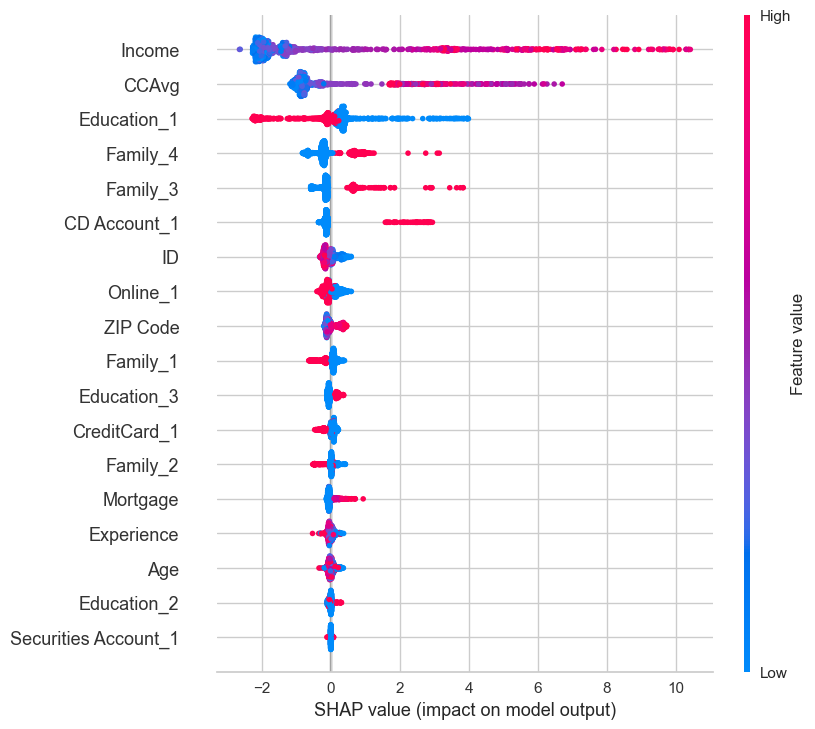

In [50]:
# Interpretando a máquina preditiva: SHAP
classification.interpret_model(classification_catboost)

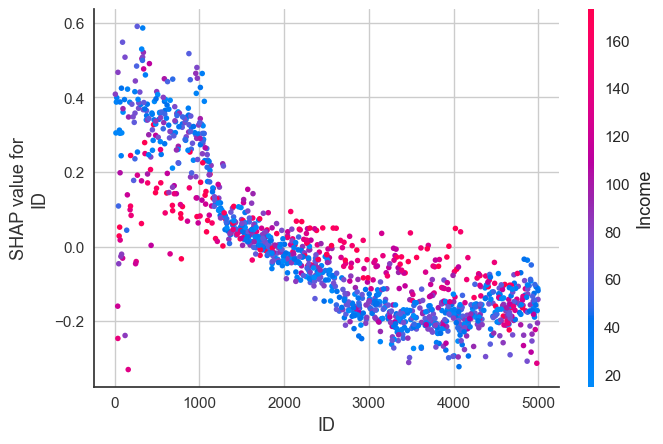

In [51]:
# Interpretando a máquina preditiva: SHAP
classification.interpret_model(classification_catboost,plot='correlation')

## Passando novos Clientes na Máquina Preditiva

In [52]:
# Dados de Teste - novos Dados
test_data_classification = pd.read_csv('https://raw.githubusercontent.com/datacodebr/PyCaret-Example/master/datasets/loan_test_data.csv')

In [53]:
test_data_classification

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0     118   58          33      61     92833       2    2.3          3   
1    1817   45          19      91     92373       2    1.7          2   
2     671   23          -1      61     92374       4    2.6          1   
3    2994   65          40      20     92647       3    0.1          3   
4    3265   67          41     114     95616       4    2.4          3   
..    ...  ...         ...     ...       ...     ...    ...        ...   
995  4331   62          37      44     90401       1    1.1          3   
996  3221   61          35      28     93302       2    0.2          3   
997  1932   28           2     140     92122       2    2.0          1   
998  4960   51          27      55     93014       1    1.6          2   
999  3985   34           8      18     95741       4    0.3          1   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0         193              0                   0           0       1   
1           0              0                   1           0       1   
2         239              0                   0           0       1   
3           0              0                   0           0       0   
4           0              0                   0           0       1   
..        ...            ...                 ...         ...     ...   
995         0              0                   0           0       0   
996       135              0                   0           0       1   
997         0              0                   0           0       1   
998       197              0                   1           0       1   
999         0              0                   0           0       0   

     CreditCard  
0             0  
1             0  
2             0  
3             1  
4             0  
..          ...  
995           0  
996           0  
997           0  
998           0  
999           0  

[1000 rows x 14 columns]

In [55]:
# Fazendo Previsões
predictions = classification.predict_model(classification_catboost, data=test_data_classification)

In [56]:
# label e Score
predictions

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0     118   58          33      61     92833       2    2.3          3   
1    1817   45          19      91     92373       2    1.7          2   
2     671   23          -1      61     92374       4    2.6          1   
3    2994   65          40      20     92647       3    0.1          3   
4    3265   67          41     114     95616       4    2.4          3   
..    ...  ...         ...     ...       ...     ...    ...        ...   
995  4331   62          37      44     90401       1    1.1          3   
996  3221   61          35      28     93302       2    0.2          3   
997  1932   28           2     140     92122       2    2.0          1   
998  4960   51          27      55     93014       1    1.6          2   
999  3985   34           8      18     95741       4    0.3          1   

     Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0         193              0                   0           0       1   
1           0              0                   1           0       1   
2         239              0                   0           0       1   
3           0              0                   0           0       0   
4           0              0                   0           0       1   
..        ...            ...                 ...         ...     ...   
995         0              0                   0           0       0   
996       135              0                   0           0       1   
997         0              0                   0           0       1   
998       197              0                   1           0       1   
999         0              0                   0           0       0   

     CreditCard  Label   Score  
0             0      0  0.9998  
1             0      0  0.9998  
2             0      0  0.9993  
3             1      0  0.9999  
4             0      0  0.9564  
..          ...    ...     ...  
995           0      0  1.0000  
996           0      0  1.0000  
997           0      0  0.9981  
998           0      0  1.0000  
999           0      0  0.9998  

[1000 rows x 16 columns]

## Salvando a Máquina Preditiva para Produção 

In [57]:
#Save
classification.save_model(classification_catboost, 'MP_EMP_catboost_prod')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Personal Loan',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Personal Loan')),
                 ('fix_perfect', Remove_100(target='Personal Loan')),
                 ('clean_names', Clean_Colum_Names()),

## Carregando a Máquina Preditiva

Aqui a Máquina pode ser Utilizada numa Aplicação (pode ser uma aplicação WEB....)

In [58]:
MP_EMP_catboost_prod = classification.load_model(model_name='MP_EMP_catboost_prod')

Transformation Pipeline and Model Successfully Loaded
